In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# load subset of sdss data
trimmed = pd.read_pickle('../data/sdss-trimmed.pkl')

In [3]:
trimmed.head()

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL
13,8093.177734,5,17.046478,3.894807,4,0.058839,-1.675958,1,0.586000,223.323318,7.818055,11.022938,237.402389,37.855757,0.002106
21,8877.455078,4,338.060822,4.427508,2,0.127508,-3.106323,1,0.150400,-4.133572,4.987796,5.466160,237.321934,38.323073,0.038081
27,6080.926270,7,51.154720,3.811555,6,0.068476,0.022960,3,0.001255,3.552019,1.736180,11.819676,237.176079,38.149940,0.008412
31,5787.621582,7,28.281967,3.762244,6,0.043783,-0.943472,6,0.022553,77.411217,2.466664,1.986041,236.719375,38.279004,0.004887
33,8628.625977,3,270.294250,4.281405,2,0.018595,-3.141042,1,0.217600,39.422123,16.191286,10.153520,236.946675,38.242511,0.031325


## Task 1: histogram of relative uncertainty

Given a percentile (*e.g.*, 0.9), produce a histogram of the relative uncertainty of the effective temperature within 1% of that percentile.

In [55]:
def make_hist(df, percentile, ax, nbins, binmax, col='TEFF_UNC_REL'):
    """Given a dataframe, plot a histogram for data within a distance percentile."""
    mindist = df['DIST_ADOP'].quantile(percentile) - 0.005
    maxdist = df['DIST_ADOP'].quantile(percentile) + 0.005
    selector = (df['DIST_ADOP'] < maxdist) & (df['DIST_ADOP'] > mindist)
    
    bins = np.linspace(0, binmax, nbins)
    
    smaller = df[selector]
    smaller[col].hist(bins=bins, ax=ax)
#    ax.set_axis_off()
#    ax.set_xlim(0,0.05)
    

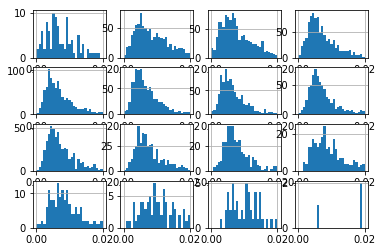

In [58]:
fig, axes = plt.subplots(4,4)
nplots = axes.size
for plot in zip(axes.flat, np.linspace(0.01, 0.98, nplots)):
    ax = plot[0]
    make_hist(trimmed, plot[1], ax, nbins=30, binmax=0.02)

In [42]:
list(zip(axes.flat, np.linspace(0.01, 0.99, nplots)))

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f52bb7cce48>, 0.01),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2f94780>,
  0.13250000000000001),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2e9e710>, 0.255),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2eb3b38>, 0.3775),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2ee0048>, 0.5),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2dd4390>,
  0.62250000000000005),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b31aed30>, 0.745),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2f21da0>,
  0.86749999999999994),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52bb79f2b0>,
  0.98999999999999999)]

In [24]:
type(fig)

matplotlib.figure.Figure

In [25]:
type(axes)

numpy.ndarray

(3, 3)

In [29]:
type(axes[0,0])

matplotlib.axes._subplots.AxesSubplot